# Introduction

In this project, you will act as a data visualization developer at Yahoo Finance! You will be helping the "Netflix Stock Profile" team visualize the Netflix stock data. In finance, a _stock profile_ is a series of studies, visualizations, and analyses that dive into different aspects a publicly traded company's data. 

For the purposes of the project, you will only visualize data for the year of 2017. Specifically, you will be in charge of creating the following visualizations:
+ The distribution of the stock prices for the past year
+ Netflix's earnings and revenue in the last four quarters
+ The actual vs. estimated earnings per share for the four quarters in 2017
+ A comparison of the Netflix Stock price vs the Dow Jones Industrial Average price in 2017 

Note: We are using the Dow Jones Industrial Average to compare the Netflix stock to the larter stock market. Learn more about why the Dow Jones Industrial Average is a general reflection of the larger stock market [here](https://www.investopedia.com/terms/d/djia.asp).

During this project, you will analyze, prepare, and plot data. Your visualizations will help the financial analysts asses the risk of the Netflix stock.

## Step 1
Import the modules that you'll be using in this project:


In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

## Step 2

Let's load the datasets and inspect them.

In [3]:
netflix_stocks=pd.read_csv('NFLX.csv')
netflix_stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,124.959999,143.460007,124.309998,140.710007,140.710007,181772200
1,2017-02-01,141.199997,145.949997,139.050003,142.130005,142.130005,91432000
2,2017-03-01,142.839996,148.289993,138.259995,147.809998,147.809998,110692700
3,2017-04-01,146.699997,153.520004,138.660004,152.199997,152.199997,149769200
4,2017-05-01,151.910004,164.750000,151.610001,163.070007,163.070007,116795800


Load **DJI.csv** into a DataFrame called `dowjones_stocks`. 

Note: You can learn more about why the Dow Jones Industrial Average is a industry reflection of the larger stock market [here](https://www.investopedia.com/terms/d/djia.asp). 


In [4]:
dowjones_stocks=pd.read_csv('DJI.csv')
dowjones_stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,19872.859375,20125.580078,19677.939453,19864.089844,19864.089844,6482450000
1,2017-02-01,19923.810547,20851.330078,19831.089844,20812.240234,20812.240234,6185580000
2,2017-03-01,20957.289063,21169.109375,20412.800781,20663.220703,20663.220703,6941970000
3,2017-04-01,20665.169922,21070.900391,20379.550781,20940.509766,20940.509766,5392630000
4,2017-05-01,20962.730469,21112.320313,20553.449219,21008.650391,21008.650391,6613570000


Load **NFLX_daily_by_quarter.csv** into a DataFrame called `netflix_stocks_quarterly`. 

In [5]:
netflix_stocks_quarterly=pd.read_csv('NFLX_daily_by_quarter.csv')
netflix_stocks_quarterly.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Quarter
0,2017-01-03,124.959999,128.190002,124.309998,127.489998,127.489998,9437900,Q1
1,2017-01-04,127.489998,130.169998,126.550003,129.410004,129.410004,7843600,Q1
2,2017-01-05,129.220001,132.750000,128.899994,131.809998,131.809998,10185500,Q1
3,2017-01-06,132.080002,133.880005,129.809998,131.070007,131.070007,10657900,Q1
4,2017-01-09,131.479996,131.990005,129.889999,130.949997,130.949997,5766900,Q1


## Step 3

What do you notice? The first two column names are one word each, and the only one that is not is `Adj Close`! 

The term `Adj Close` is a confusing term if you don't read the Yahoo Documentation. In Yahoo, `Adj Close` is documented as adjusted close price adjusted for both dividends and splits.

This means this is the column with the true closing price, so these data are very important.

Use Pandas to change the name of of the column to `Adj Close` to `Price` so that it is easier to work with the data. Remember to use `inplace=True`.

Do this for the Dow Jones and Netflix Quarterly pandas dataframes as well.
Hint: Use [`.rename()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)).


In [6]:
netflix_stocks.rename(columns={'Adj Close':'Price'},inplace=True)
dowjones_stocks.rename(columns={'Adj Close':'Price'},inplace=True)
netflix_stocks_quarterly.rename(columns={'Adj Close':'Price'},inplace=True)

statistical summary for each dataset 

In [8]:
netflix_stocks.describe()

,Open,High,Low,Close,Price,Volume
count,12.000000,12.000000,12.000000,12.000000,12.000000,1.200000e+01
mean,162.109168,174.188333,154.949168,168.079169,168.079169,1.420596e+08
std,22.427309,22.889526,19.519561,21.298918,21.298918,3.597514e+07
min,124.959999,143.460007,124.309998,140.710007,140.710007,9.143200e+07
25%,145.734997,152.212501,138.952503,149.010003,149.010003,1.141848e+08
50%,157.715004,175.744995,149.455002,168.890007,168.890007,1.360994e+08
75%,182.205002,192.247501,173.475002,184.235005,184.235005,1.667328e+08
max,197.240005,204.380005,184.320007,196.429993,196.429993,2.086578e+08


In [9]:
dowjones_stocks.describe()

,Open,High,Low,Close,Price,Volume
count,12.000000,12.000000,12.000000,12.000000,12.000000,1.200000e+01
mean,21576.639323,22090.152507,21334.914388,21937.621745,21937.621745,6.510095e+09
std,1332.002426,1458.599365,1321.564593,1503.771517,1503.771517,6.329533e+08
min,19872.859375,20125.580078,19677.939453,19864.089844,19864.089844,5.392630e+09
25%,20884.259278,21101.965332,20404.488281,20908.442383,20908.442383,6.176700e+09
50%,21211.425781,21732.415039,21136.760742,21620.375000,21620.375000,6.536170e+09
75%,22092.194824,22685.944824,21886.223144,22648.127441,22648.127441,7.010125e+09
max,24305.400391,24876.070313,23921.900391,24719.220703,24719.220703,7.335640e+09


In [11]:
netflix_stocks_quarterly.describe()

,Open,High,Low,Close,Price,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,165.402311,167.048725,163.487012,165.374263,165.374263,6.589608e+06
std,21.311867,21.594081,20.968138,21.295641,21.295641,4.117679e+06
min,124.959999,128.190002,124.309998,127.489998,127.489998,2.160500e+06
25%,144.564995,145.750000,143.329994,144.245002,144.245002,4.500900e+06
50%,162.910004,163.929993,160.550003,162.429993,162.429993,5.518600e+06
75%,185.915001,188.120002,183.209999,185.594994,185.594994,7.145300e+06
max,201.949997,204.380005,198.089996,202.679993,202.679993,4.158740e+07


## Step 4

In this step, we will be visualizing the Netflix quarterly data! 

We want to get an understanding of the distribution of the Netflix quarterly stock prices for 2017. Specifically, we want to see in which quarter stock prices flucutated the most. We can accomplish this using a violin plot with four violins, one for each business quarter!


1. Start by creating a variable `ax` and setting it equal to `sns.violinplot()`. This will instantiate a figure and give us access to the axes through the variable name `ax`.
2. Use `sns.violinplot()` and pass in the following arguments:
+ The `Quarter` column as the `x` values
+ The `Price` column as your `y` values
+ The `netflix_stocks_quarterly` dataframe as your `data`
3. Improve the readability of the chart by adding a title of the plot. Add `"Distribution of 2017 Netflix Stock Prices by Quarter"` by using `ax.set_title()`
4. Change your `ylabel` to "Closing Stock Price"
5. Change your `xlabel` to "Business Quarters in 2017"
6. Be sure to show your plot!


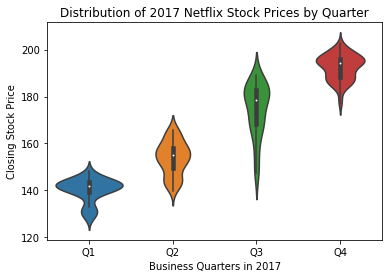

In [12]:
plt.figure()
sns.violinplot(x='Quarter',y='Price',data=netflix_stocks_quarterly)
plt.title("Distribution of 2017 Netflix Stock Prices by Quarter")
plt.xlabel('Business Quarters in 2017')
plt.ylabel('Closing Stock Price')
plt.show()

The stock price by quarter continued increase, fall between 125 to 200 throughout the year
The price of Q3 flucutated most, the price in Q1,Q2 Q4 show bimodal distribution

## Step 5

Next, we will chart the performance of the earnings per share (EPS) by graphing the estimate Yahoo projected for the Quarter compared to the actual earnings for that quarters. We will accomplish this using a scatter chart. 


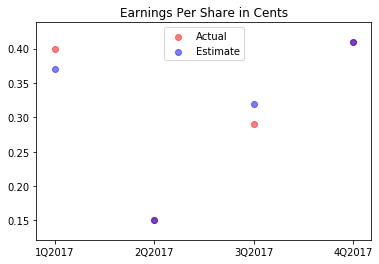

In [13]:
x_positions = [1, 2, 3, 4]
chart_labels = ["1Q2017","2Q2017","3Q2017","4Q2017"]
earnings_actual =[.4, .15,.29,.41]
earnings_estimate = [.37,.15,.32,.41 ]

plt.scatter(x_positions,earnings_actual,color='red',label='Actual',alpha=0.5)
plt.scatter(x_positions,earnings_estimate,color='blue',label='Estimate',alpha=0.5)
plt.legend(loc='upper center')
plt.xticks(x_positions, chart_labels)
plt.title('Earnings Per Share in Cents')
plt.show()

 What do the purple dots tell us about the actual and estimate earnings per share in this graph? Hint: In color theory red and blue mix to make purple.

There are 2 quarter(Q2,Q4) Yahoo's projected value same as the actual earnings. Although, there are gaps between predicted and actual in Q1 and Q3, but the difference is very small.

## Step 6

Next, we will visualize the earnings and revenue reported by Netflix by mapping two bars side-by-side. We have visualized a similar chart in the second Matplotlib lesson [Exercise 4](https://www.codecademy.com/courses/learn-matplotlib/lessons/matplotlib-ii/exercises/side-by-side-bars).

As you may recall, plotting side-by-side bars in Matplotlib requires computing the width of each bar before hand. We have pasted the starter code for that exercise below. 

1. Fill in the `n`, `t`, `d`, `w` values for the revenue bars
2. Plot the revenue bars by calling `plt.bar()` with the newly computed `x_values` and the `revenue_by_quarter` data
3. Fill in the `n`, `t`, `d`, `w` values for the earnings bars
4. Plot the revenue bars by calling `plt.bar()` with the newly computed `x_values` and the `earnings_by_quarter` data
5. Create a legend for your bar chart with the `labels` provided
6. Add a descriptive title for your chart with `plt.title()`
7. Add labels to each quarter by assigning the position of the ticks through the code provided. Hint:  `plt.xticks(middle_x, quarter_labels)`
8. Be sure to show your plot!


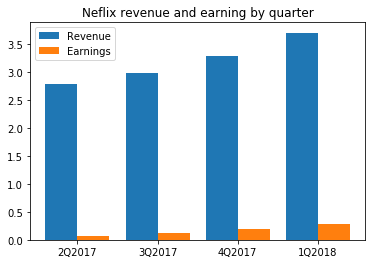

In [21]:
# The metrics below are in billions of dollars
revenue_by_quarter = [2.79, 2.98,3.29,3.7]
earnings_by_quarter = [.0656,.12959,.18552,.29012]
quarter_labels = ["2Q2017","3Q2017","4Q2017", "1Q2018"]



# Revenue
n = 1  # This is our first dataset (out of 2)
t = 2 # Number of dataset
d = 4 # Number of sets of bars
w = 0.8 # Width of each bar
bars1_x = [t*element + w*n for element
             in range(d)]
plt.bar(bars1_x,revenue_by_quarter)


# Earnings
n = 2  # This is our second dataset (out of 2)
t = 2 # Number of dataset
d = 4 # Number of sets of bars
w = 0.8 # Width of each bar
bars2_x = [t*element + w*n for element
             in range(d)]

plt.bar(bars2_x,earnings_by_quarter)



middle_x = [ (a + b) / 2.0 for a, b in zip(bars1_x, bars2_x)]
plt.xticks(middle_x,quarter_labels)
labels = ["Revenue", "Earnings"]
plt.legend(labels)
plt.title('Neflix revenue and earning by quarter')
plt.show()



The revnue and earnings are follow same upward trend, with almost 8% of the revenue constitues earnings

## Step 7

In this last step, we will compare Netflix stock to the Dow Jones Industrial Average in 2017. We will accomplish this by plotting two line charts side by side in one figure. 



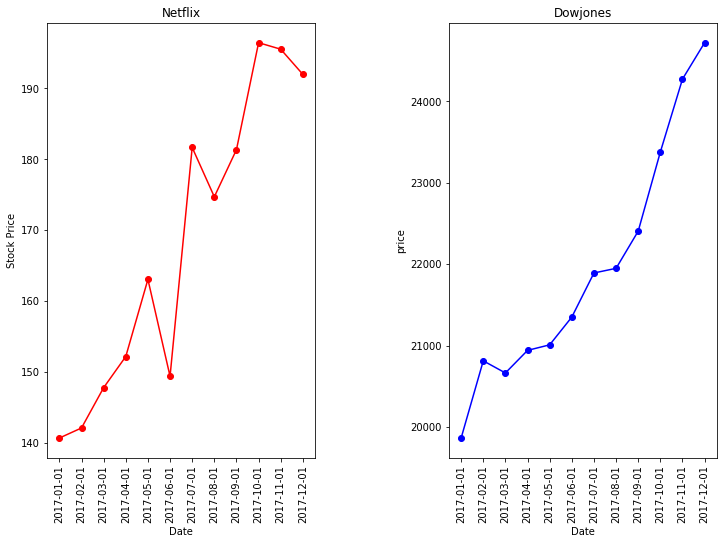

In [14]:
# Left plot Netflix
# ax1 = plt.subplot(total number rows, total number columns, index of subplot to modify)
plt.figure(figsize=(12,8))
ax1=plt.subplot(1,2,1)
plt.plot(netflix_stocks['Date'],netflix_stocks['Price'],color='red',marker='o')
ax1.set_title('Netflix')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price')
plt.xticks(rotation='vertical')


# Right plot Dow Jones
ax2 = plt.subplot(1,2,2)
plt.plot(dowjones_stocks['Date'], dowjones_stocks['Price'],color='blue',marker='o')
ax2.set_title('Dowjones')
ax2.set_xlabel('Date')
ax2.set_ylabel('price')
plt.xticks(rotation='vertical')
plt.subplots_adjust(wspace=.5)
plt.show()







In [16]:
r=dowjones_stocks['Price'].corr(netflix_stocks['Price'])
r

0.9087728208658278

The stock price of Netflix fluctuated a lot in Q2 and Q3, and the whole trend of Netflix is related to  Dow Jones index trend closely, the correlation between them is 0.91, the increase rate of them are almost same, around 35%.